The problem is about holiday package prediction for a trips and travel company. The company aims to establish a viable business model to expand its customer base. One way to achieve this is by introducing new package offerings.

Currently, there are five types of packages: Basic, Standard, Deluxe, Super Deluxe, and King. Analysis of last year's data shows that 18% of customers purchased a package. However, marketing costs were high because customers were contacted at random without considering available information.

The company plans to launch a new product called the Wellness Tourism package. Wellness tourism is defined as travel that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle and support or increase one's sense of well-being.

This time, the company wants to harness the available data of existing and potential customers to make marketing expenditure more efficient.

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [214]:
df = pd.read_csv('Travel.csv')

In [215]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [217]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

# Data Cleaning
#### 1. Remove duplicates 
#### 2. Handle missing values
#### 3. Understand the structure of the data

In [218]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [219]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [220]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [221]:
df['Gender'] = df['Gender'].replace({'Fe Male' : 'Female'})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single' : 'Unmarried'})

In [222]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [223]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [224]:
features_nan = [features for features in df.columns if df[features].isnull().sum()>=1]

for feature in features_nan:
    print(feature, np.round(df[feature].isnull().mean() * 100,4), '% of missing values')

Age 4.6236 % of missing values
TypeofContact 0.5115 % of missing values
DurationOfPitch 5.135 % of missing values
NumberOfFollowups 0.9206 % of missing values
PreferredPropertyStar 0.5319 % of missing values
NumberOfTrips 2.8642 % of missing values
NumberOfChildrenVisiting 1.3502 % of missing values
MonthlyIncome 4.7668 % of missing values


In [225]:
df[features_nan].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# Imputing the null values
#### 1. Age with mean (continuous value)
#### 2. TypeofContact with mode (category)
#### 3. DurationOfPitch with median
#### 4. NumberOfFollowups with mode (discrete)
#### 5. PreferredPropertyStar with mode (discrete)
#### 6. NumberOfTrips with median
#### 7. NumberOfChildrenVisiting with mode
#### 8. MonthlyIncome with median

In [226]:
#Age
df['Age'].fillna(df['Age'].mean(), inplace=True)

#TypeofContact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

#DurationOfPitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)

#NumberOfFollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

#PreferredPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

#NumberOfTrips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)

#NumberOfChildrenVisiting
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

#MonthlyIncome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


In [227]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [228]:
df.drop(columns=['CustomerID'], axis=1, inplace=True)

# Feture Engineering

In [229]:
df['NumberOfTotalVisitors'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [230]:
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [231]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,NumberOfTotalVisitors
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [232]:
# Categorical features
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
print("Categorical Features: ", categorical_features)

Categorical Features:  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [233]:
# Numerical features
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
print("Numerical Features: ", numerical_features)

Numerical Features:  ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'NumberOfTotalVisitors']


In [234]:
# Discrete features
discrete_features = [features for features in numerical_features if len(df[features].unique()) < 25]
print("Discrete Features: ", discrete_features)

Discrete Features:  ['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfTotalVisitors']


In [235]:
# Continuous features
continuous_features = [features for features in numerical_features if features not in discrete_features]
print("Continuous Features: ", continuous_features)

Continuous Features:  ['Age', 'DurationOfPitch', 'MonthlyIncome']


In [236]:
# Target and features separation
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [237]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,NumberOfTotalVisitors
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [238]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [239]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [240]:
# Scale and Encode

cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(exclude=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder(drop='first')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_features),
        ('cat', oh_encoder, cat_features)
    ])

In [241]:
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome',
       'NumberOfTotalVisitors'],
      dtype='object')),
                                ('cat', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])


In [242]:
X_train = preprocessor.fit_transform(X_train)

In [243]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.165989,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.500391,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.388898,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.056138,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.722518,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-1.054495,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3906,0.389328,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3907,0.056138,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3908,-1.054495,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [244]:
X_test = preprocessor.transform(X_test)

In [245]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [246]:
# model training

models ={
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators =1000, min_samples_split = 2, min_samples_leaf = 2, max_depth = 40, bootstrap = False)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    #Prediction on Test data
    y_test_pred = model.predict(X_test)
    
    #Prediction on Train data
    y_train_pred = model.predict(X_train)
    
    #Train set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)
    
    #Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    #Printing the results
    print(f"Model: {model_name}")
    print("Train Set Performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}, Precision: {model_train_precision:.4f}, Recall: {model_train_recall:.4f}, F1-Score: {model_train_f1:.4f}, ROC-AUC: {model_train_roc_auc:.4f}")
    print("Test Set Performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}, Precision: {model_test_precision:.4f}, Recall: {model_test_recall:.4f}, F1-Score: {model_test_f1:.4f}, ROC-AUC: {model_test_roc_auc:.4f}")
    print("-"*50)
    
    



Model: LogisticRegression
Train Set Performance:
Accuracy: 0.8460, Precision: 0.7003, Recall: 0.3045, F1-Score: 0.4245, ROC-AUC: 0.6373
Test Set Performance:
Accuracy: 0.8364, Precision: 0.6914, Recall: 0.2932, F1-Score: 0.4118, ROC-AUC: 0.6307
--------------------------------------------------
Model: DecisionTree
Train Set Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, ROC-AUC: 1.0000
Test Set Performance:
Accuracy: 0.9110, Precision: 0.7796, Recall: 0.7592, F1-Score: 0.7692, ROC-AUC: 0.8535
--------------------------------------------------
Model: RandomForest
Train Set Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, ROC-AUC: 1.0000
Test Set Performance:
Accuracy: 0.9335, Precision: 0.9701, Recall: 0.6806, F1-Score: 0.8000, ROC-AUC: 0.8378
--------------------------------------------------


In [247]:
# Hyperparameter Tuning for Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid_randomforest = {
    'n_estimators': [100, 200, 300, 400, 500],
    
    # Splitting and Tree Structure
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.02],
    
    # Feature Selection at Split
    'max_features': ['auto', 'sqrt', 'log2', None],
    
    # Bootstrapping
    'bootstrap': [True, False],
    'oob_score': [True, False],  # (only works with bootstrap=True)
    
    # Model Criteria
    'criterion': ['gini', 'entropy', 'log_loss'],
    
    # Imbalanced Data Handling
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    
    # Pruning
    'ccp_alpha': [0.0, 0.01, 0.1]
}


In [248]:
randomcv_models = [
    ('RandomForest', rf_classifier, param_dist_randomforest)
]

In [249]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for model_name, model, param_dist in randomcv_models:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    model_param[model_name] = random_search.best_params_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': False}


In [251]:
# model training after getting best parameters

models ={
    'RandomForest': RandomForestClassifier(n_estimators =1000, min_samples_split = 2, min_samples_leaf = 2, max_depth = 40, bootstrap = False)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    #Prediction on Test data
    y_test_pred = model.predict(X_test)
    
    #Prediction on Train data
    y_train_pred = model.predict(X_train)
    
    #Train set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)
    
    #Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    #Printing the results
    print(f"Model: {model_name}")
    print("Train Set Performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}, Precision: {model_train_precision:.4f}, Recall: {model_train_recall:.4f}, F1-Score: {model_train_f1:.4f}, ROC-AUC: {model_train_roc_auc:.4f}")
    print("Test Set Performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}, Precision: {model_test_precision:.4f}, Recall: {model_test_recall:.4f}, F1-Score: {model_test_f1:.4f}, ROC-AUC: {model_test_roc_auc:.4f}")
    print("-"*50)
    
    



Model: RandomForest
Train Set Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000, ROC-AUC: 1.0000
Test Set Performance:
Accuracy: 0.9315, Precision: 0.9697, Recall: 0.6702, F1-Score: 0.7926, ROC-AUC: 0.8325
--------------------------------------------------


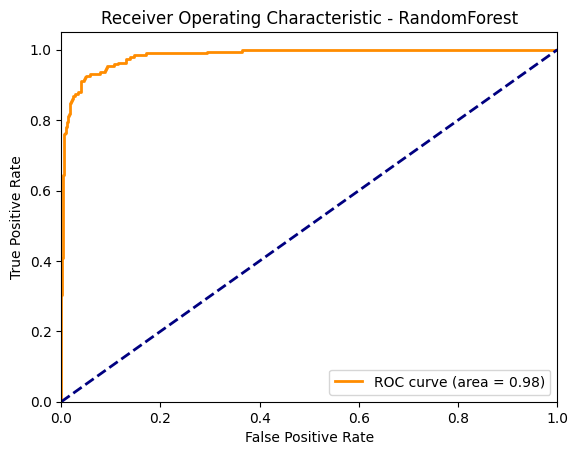

In [259]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
for model_name, model in models.items():
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()